<a href="https://colab.research.google.com/github/mahii6991/transfer_learning_bert/blob/main/feature_based_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Helper Functions

A file named helper_functions.py would typically contain various functions or classes that provide additional utility and support for a specific project or task. These functions could include data preprocessing functions, model evaluation functions, visualization functions, or other custom utility functions.

In [ ]:
 !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-23 14:11:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-23 14:11:40 (77.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
#here we will be coding a feature based , or working on the feature based model and understanding its accuracy with respect to our dataset
from helper_functions import unzip_data, calculate_results
unzip_data('/content/train_test.zip')

# Loading Data-Set

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,Unnamed: 0,sentences,Subject,Object,relations,relations_id
0,0,“Brands that optimized their eGift and gift ca...,Theresa McEndree,Blackhawk Network,managerOf,0
1,1,"This is a huge win for retailers, as gift car...","Theresa McEndree,",Blackhawk Network,managerOf,0
2,4,"This is a huge win for retailers, as gift car...",Theresa McEndree,Blackhawk Network,employedBy,2
3,5,by[E1] Esther Shein[/E1] in [E2]CXO[/E2],Esther Shein,CXO,employedBy,2
4,6,COVID-19 has forced many organizations to rein...,Claudia Crummenerl,Capgemini Invent,managerOf,0


In [ ]:
df_train.shape

(814, 6)

In [ ]:
df_train['sentences'][0]

'“Brands that optimized their eGift and gift card eCommerce experience won this holiday season. As consumer behavior continued the rapid, digital migration, gift card programs are no exception. This is a huge win for retailers, as gift card recipients show up ready and excited to use them,” said [E1]Theresa McEndree[/E1], global head of marketing and corporate brand, [E2]Blackhawk Network[/E2]. “Digital adoption will continue and is here to stay. This stream of digital shoppers will benefit retail sales in the first quarter of the year. Nearly half of consumers surveyed expect to spend at least $25 more than the value of their gift cards—and many plan to spend them within the first few months following the holiday season.”'

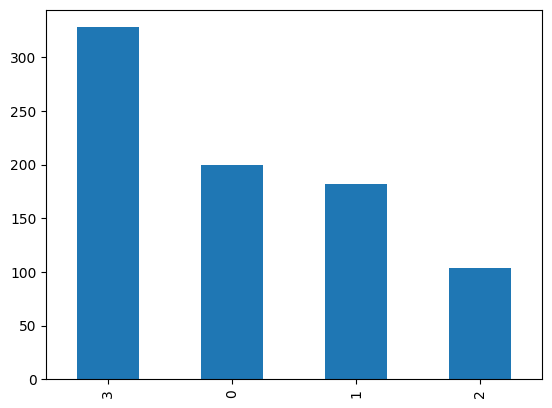

In [ ]:
import matplotlib.pyplot as plt
#understanding the relations id plot 
df_train['relations_id'].value_counts().plot(kind='bar')
plt.show()

Installing necessary libraries

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)


* DistilBERT: DistilBERT is a distilled version of the BERT (Bidirectional Encoder Representations from Transformers) model. It offers a smaller and faster alternative to BERT while still maintaining a comparable level of performance. DistilBERT provides a good balance between accuracy and computational efficiency, making it suitable for many NLP tasks.

In [ ]:
from transformers import DistilBertModel, DistilBertTokenizer
import torch

In [ ]:
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text_data = df_train['sentences']

In [ ]:
my_text_data = list(text_data)

* Tokenize and encode the text data: Use the DistilBERT tokenizer to tokenize and encode your text data.

In [ ]:
encoded_inputs = tokenizer(my_text_data, padding=True, truncation=True, return_tensors='pt')

* Pass the encoded inputs to the model: Use the encoded inputs as input to the DistilBERT model to obtain the extracted features.

In [ ]:
encoded_inputs

{'input_ids': tensor([[ 101, 1523, 9639,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        [ 101, 2023, 2003,  ...,    0,    0,    0],
        ...,
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2057,  ...,    0,    0,    0],
        [ 101, 1523, 2023,  ...,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
print(encoded_inputs['input_ids'][0])

tensor([  101,  1523,  9639,  2008, 23569, 27605,  5422,  2037,  1041,  5856,
         6199,  1998,  5592,  4003, 17338, 15810,  3401,  3325,  2180,  2023,
         6209,  2161,  1012,  2004,  7325,  5248,  2506,  1996,  5915,  1010,
         3617,  9230,  1010,  5592,  4003,  3454,  2024,  2053,  6453,  1012,
         2023,  2003,  1037,  4121,  2663,  2005, 16629,  1010,  2004,  5592,
         4003, 15991,  2265,  2039,  3201,  1998,  7568,  2000,  2224,  2068,
         1010,  1524,  2056,  1031,  1041,  2487,  1033, 14781, 11338, 10497,
         9910,  1031,  1013,  1041,  2487,  1033,  1010,  3795,  2132,  1997,
         5821,  1998,  5971,  4435,  1010,  1031,  1041,  2475,  1033,  2304,
        17998,  2897,  1031,  1013,  1041,  2475,  1033,  1012,  1523,  3617,
         9886,  2097,  3613,  1998,  2003,  2182,  2000,  2994,  1012,  2023,
         5460,  1997,  3617,  4497,  7347,  2097,  5770,  7027,  4341,  1999,
         1996,  2034,  4284,  1997,  1996,  2095,  1012,  3053, 

In [ ]:
print(encoded_inputs['attention_mask'][0])

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
encoded_inputs['input_ids'].shape

torch.Size([814, 215])

why last hidden state is used.?

In [ ]:
with torch.no_grad():
    outputs = model(**encoded_inputs)
    features = outputs.last_hidden_state

In [ ]:
features[0][0]

tensor([-2.5937e-02, -2.8130e-01,  2.5150e-01,  9.9255e-02,  2.1767e-01,
        -3.9666e-02,  8.2208e-02,  2.2253e-01, -1.8351e-01, -3.2620e-01,
        -7.6489e-02, -2.5131e-01,  1.2909e-01,  3.0540e-01, -1.5692e-01,
         3.0184e-02, -2.1520e-02,  3.8630e-01,  2.7099e-01,  6.4259e-02,
        -2.5658e-01, -5.4001e-01,  3.9317e-01,  4.0183e-01,  1.2379e-01,
        -3.4435e-01,  1.7088e-01, -4.4386e-01,  3.5878e-03,  1.5561e-01,
         1.6252e-01,  3.5084e-01, -2.0291e-01, -3.3156e-01,  2.5210e-01,
        -1.8584e-01,  9.6046e-03, -5.1485e-01, -2.3336e-01,  2.8642e-02,
        -2.2054e-01,  1.6761e-01,  1.6241e-01, -1.0370e-01, -5.5251e-02,
         1.6854e-01, -3.3006e+00, -1.1218e-02, -1.1030e-01, -2.3361e-01,
         2.5611e-02, -1.7702e-02, -1.2709e-01,  1.2198e-01,  2.2434e-01,
         1.6162e-01, -5.0513e-01,  3.0116e-01, -5.1491e-02, -4.9251e-02,
         2.1268e-01,  4.6171e-02, -2.6103e-01, -2.1617e-01, -2.8631e-01,
        -2.5395e-01,  1.6211e-02,  4.9497e-01, -3.1

* checking out the length of the features after getting the required features extracted. the features extracted from DistilBERT provide a compact and meaningful representation of the input sentences, capturing both the contextual information (relationships between words) and semantic representations (underlying meaning). These features serve as a rich source of information that can be leveraged for various natural language processing tasks.

In [ ]:
features[0].shape

torch.Size([215, 768])

In [ ]:
len(features)

In [ ]:
y_train = df_train['relations_id']

* Based on one of the authors , we used our study simple and used the logitic regression as our first model.

In [ ]:
X = features

In [ ]:
# train classifier
from sklearn.linear_model import LogisticRegression

# Reshape features
X_reshaped = X.reshape(X.shape[0], -1)

In [ ]:
logit = LogisticRegression()

In [ ]:
logit.fit(X_reshaped,y_train)

In [ ]:
# Calculate accuracy on the training set
accuracy = logit.score(X_reshaped, y_train)
print("Training accuracy:", accuracy)